# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>**Grade 4 Math**, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Suppress Pandas SettingWithCopyWarning
pd.options.mode.chained_assignment = None


Load in the "states_edu.csv" dataset and take a look at the head of the data

In [4]:
df = pd.read_csv('../data/states_edu.csv')

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [17]:
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)
df['ENROLL_ALL'] = df['ENROLL_ALL'].fillna(df["ENROLL_PREK"]+df["ENROLL_PRIMARY"]+df["ENROLL_HS"])
df.dropna(subset=['AVG_MATH_4_SCORE'], inplace=True)
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_4,ENROLL_8,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN
5,1992_COLORADO,COLORADO,1992,NaN,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,...,50648.0,45025.0,34533.0,NaN,NaN,612635.0,221.0,272.0,217.0,NaN


<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: *Grade 4 math score*

How many years of data are logged in our dataset? 

In [16]:
print(df['YEAR'].value_counts().shape[0],'years of data are logged into the dataset')

13 years of data are logged into the dataset


Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [23]:
print('Michigan avg test score (4th grade math):',df[df['STATE'] == 'MICHIGAN']['AVG_MATH_4_SCORE'].mean().round(2))
print('Ohio avg test score (4th grade math):',df[df['STATE'] == 'OHIO']['AVG_MATH_4_SCORE'].mean().round(2))
#ohio has the higher score

Michigan avg test score (4th grade math): 234.36
Ohio avg test score (4th grade math): 239.45


Find the average for your outcome score across all states in 2019

In [25]:
df.groupby('STATE')['AVG_MATH_4_SCORE'].mean().round(2)

STATE
ALABAMA                 226.09
ALASKA                  234.78
ARIZONA                 230.91
ARKANSAS                231.55
CALIFORNIA              227.91
COLORADO                239.40
CONNECTICUT             239.91
DELAWARE                237.20
DISTRICT_OF_COLUMBIA    216.55
DODEA                   241.60
FLORIDA                 238.80
GEORGIA                 232.55
HAWAII                  232.18
IDAHO                   237.00
ILLINOIS                235.40
INDIANA                 241.18
IOWA                    240.09
KANSAS                  242.60
KENTUCKY                233.64
LOUISIANA               226.64
MAINE                   240.00
MARYLAND                236.82
MASSACHUSETTS           246.00
MICHIGAN                234.36
MINNESOTA               245.00
MISSISSIPPI             226.27
MISSOURI                236.09
MONTANA                 240.40
NATIONAL                233.85
NEBRASKA                238.00
NEVADA                  232.00
NEW_HAMPSHIRE           246.30
NE

Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [27]:
df.groupby('STATE')['AVG_MATH_4_SCORE'].max()

STATE
ALABAMA                 233.0
ALASKA                  237.0
ARIZONA                 240.0
ARKANSAS                240.0
CALIFORNIA              235.0
COLORADO                247.0
CONNECTICUT             245.0
DELAWARE                243.0
DISTRICT_OF_COLUMBIA    235.0
DODEA                   250.0
FLORIDA                 246.0
GEORGIA                 240.0
HAWAII                  243.0
IDAHO                   242.0
ILLINOIS                239.0
INDIANA                 249.0
IOWA                    246.0
KANSAS                  248.0
KENTUCKY                242.0
LOUISIANA               234.0
MAINE                   246.0
MARYLAND                247.0
MASSACHUSETTS           253.0
MICHIGAN                238.0
MINNESOTA               253.0
MISSISSIPPI             241.0
MISSOURI                241.0
MONTANA                 244.0
NATIONAL                242.0
NEBRASKA                246.0
NEVADA                  237.0
NEW_HAMPSHIRE           253.0
NEW_JERSEY              249.0
NEW_

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [30]:
#features (TOTAL_EXPENDITURE_PER_STUDENT, AVG_READING_4_SCORE, AVG_MATH_8_SCORE)
df['TOTAL_EXPENDITURE'].fillna(df['TOTAL_EXPENDITURE'].median(),inplace=True)
df['TOTAL_EXPENDITURE_PER_STUDENT'] = df['TOTAL_EXPENDITURE'] / df['ENROLL_ALL']

Feature engineering justification: **<Standardized total expenditure per student, since states with more people will usually have more total expenditure proportionally>**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

<Axes: xlabel='TOTAL_EXPENDITURE_PER_STUDENT', ylabel='AVG_MATH_4_SCORE'>

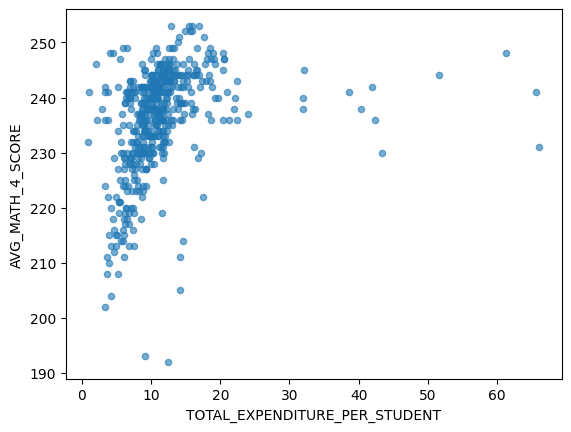

In [31]:
df.plot.scatter(x='TOTAL_EXPENDITURE_PER_STUDENT', y='AVG_MATH_4_SCORE', alpha=0.6)

**<It seems like TOTAL Expenditure per student and avg_math_4_score are correlated, however there seems to be minimal increase in math score after x=20, which is interesting, but makes sense, because there is only so much that you can pay to improve schooling until it becomes excessive>**

**Visualization 2**

<Axes: xlabel='AVG_MATH_8_SCORE', ylabel='AVG_MATH_4_SCORE'>

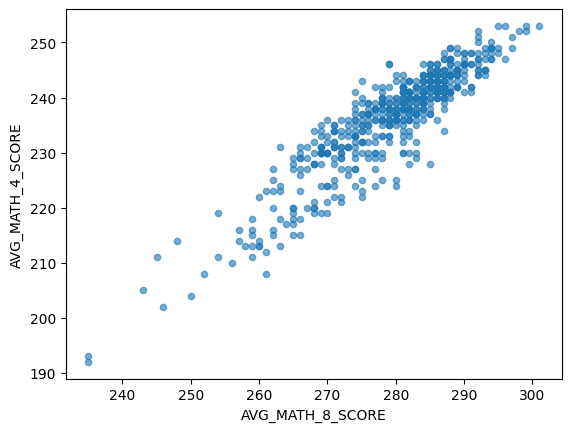

In [32]:
df.plot.scatter(x='AVG_MATH_8_SCORE', y='AVG_MATH_4_SCORE', alpha=0.6)

**<It makes sense that there would be strong correlation between the 8th graders and 4th graders math scores, because a state with high achieving 4th graders are usually going to have similar educational opportunities as 8th graders, hence the correlated score>**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X = df[['TOTAL_EXPENDITURE_PER_STUDENT','AVG_MATH_8_SCORE','AVG_READING_4_SCORE']].dropna()
y = df.loc[X.index]['AVG_MATH_4_SCORE']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [39]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [42]:
#create your model here
model = LinearRegression()

In [43]:
model.fit(X_train, y_train)

LinearRegression()

In [44]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [48]:
# mean error
print('mean error:',np.mean(model.predict(X_test)-y_test))
# mean absolute error
print('mean absolute error:',np.mean(np.abs(model.predict(X_test)-y_test)))
# root mean squared error -- penalizes large errors
print('root mean squared error',np.mean((model.predict(X_test)-y_test)**2)**0.5)

print('score:',model.score(X_test, y_test))

mean error: 0.3245643411003959
mean absolute error: 3.0684352681341833
root mean squared error 3.9610550807827494
score: 0.8533642077968997


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

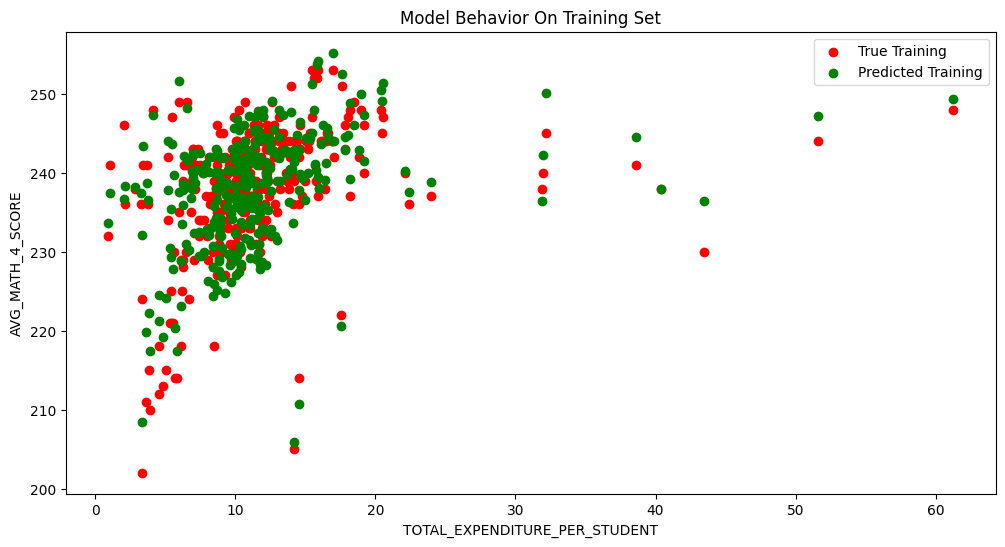

In [51]:
col_name = 'TOTAL_EXPENDITURE_PER_STUDENT'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('AVG_MATH_4_SCORE')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

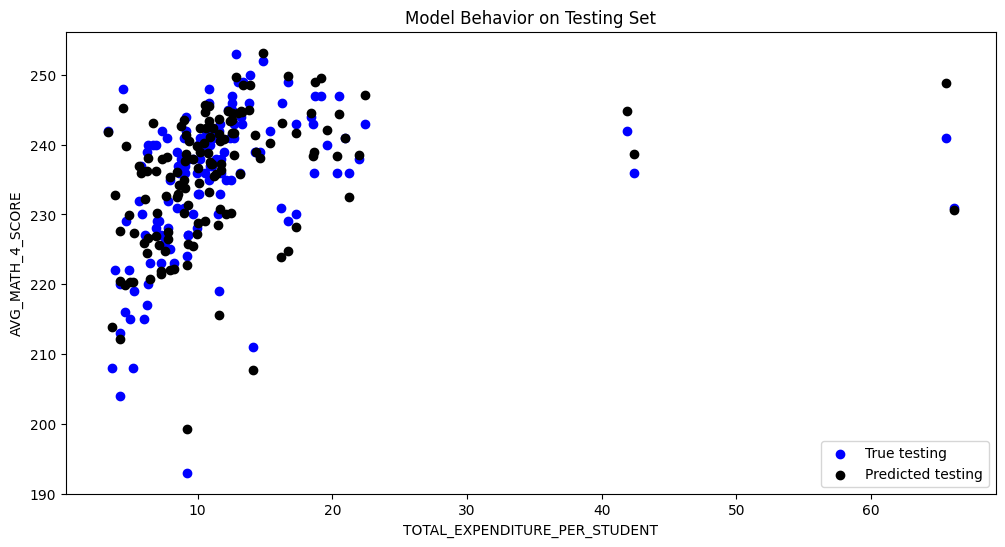

In [52]:
col_name = 'TOTAL_EXPENDITURE_PER_STUDENT'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('AVG_MATH_4_SCORE')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

**<I think the model performed pretty well when comparing the scatter plots TOTAL_EXPENDITURE PER STUDENT, which was the feature with the least clear correlation to 4th grade math scores. It seems to overshoot some of the test scores, especially with larger total expenditure per student, but this could be due to the overall amount of outliers in the training data. Perhaps a different model would have been more suitable.\>**